In [108]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [109]:
CURRENT_DIR = os.getcwd()
PROJECT_DIR = os.path.dirname(CURRENT_DIR)
MODELS_PATH = os.path.join(PROJECT_DIR, 'models')
ENCODER_PATH = os.path.join(MODELS_PATH, 'encoders')
TEST_DATA_PATH = os.path.join(PROJECT_DIR, 
                              'data', 'raw', 'carInsurance_train.csv')

CATEG_PATH = os.path.join(PROJECT_DIR, 'references', 'categorical_columns.txt')
CONTI_PATH = os.path.join(PROJECT_DIR, 'references', 'continous_columns.txt')

PROJECT_NAME = '2.1-ie-base-model'

In [110]:
# adding system path
sys.path.insert(0, PROJECT_DIR)

In [111]:
# import internal function
from src.data import process_pipeline, encoder_pipeline, feature_selection_pipeline

In [112]:
# %% Helper Function
def get_content(txt_file):
    contents = []
    with open(txt_file) as file:
        for line in file:
            contents.append(line.strip())
            
    return contents

def plot_confusion_matrix_custom(model, X_test, y_test, classes):
    # Predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


def evaluate_model_with_graph(model, X_test, y_test, classes):
    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy, Precision, Recall, F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    plot_confusion_matrix_custom(model, X_test, y_test, classes)

In [113]:
df = pd.read_csv(TEST_DATA_PATH)
df = process_pipeline.process_data(df)
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallDuration
0,1,32,management,single,tertiary,0,1218,1,0,1,28,jan,2,-1,0,0,1900-01-01 13:45:20,1900-01-01 13:46:30,0,70.0
1,2,32,blue-collar,married,primary,0,1156,1,0,0,26,may,5,-1,0,0,1900-01-01 14:49:03,1900-01-01 14:52:08,0,185.0
2,3,29,management,single,tertiary,0,637,1,0,1,3,jun,1,119,1,0,1900-01-01 16:30:24,1900-01-01 16:36:04,1,340.0
3,4,25,student,single,primary,0,373,1,0,1,11,may,2,-1,0,0,1900-01-01 12:06:43,1900-01-01 12:20:22,1,819.0
4,5,30,management,married,tertiary,0,2694,0,0,1,3,jun,1,-1,0,0,1900-01-01 14:35:44,1900-01-01 14:38:56,0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,1,25,may,1,40,2,0,1900-01-01 17:46:28,1900-01-01 17:50:57,1,269.0
3996,3997,49,admin.,divorced,secondary,0,124,1,1,1,29,jul,19,-1,0,0,1900-01-01 14:49:16,1900-01-01 14:51:21,0,125.0
3997,3998,27,admin.,single,secondary,0,-400,0,1,1,8,jul,1,-1,0,0,1900-01-01 12:19:03,1900-01-01 12:23:53,0,290.0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,1,29,jan,1,227,3,0,1900-01-01 11:27:35,1900-01-01 11:29:14,0,99.0


In [114]:
# Encoding
le = encoder_pipeline.getEncoder(ENCODER_PATH, df, PROJECT_NAME)

# return numeric datatype DataFrame
df = le.label_encoder()

# Get list of categorical & continous variable
categ = get_content(CATEG_PATH)
conti = get_content(CONTI_PATH)

In [115]:
# inspect dtype, make sure no obj dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                4000 non-null   int64         
 1   Age               4000 non-null   int64         
 2   Job               4000 non-null   int32         
 3   Marital           4000 non-null   int32         
 4   Education         4000 non-null   int32         
 5   Default           4000 non-null   int64         
 6   Balance           4000 non-null   int64         
 7   HHInsurance       4000 non-null   int64         
 8   CarLoan           4000 non-null   int64         
 9   Communication     4000 non-null   int64         
 10  LastContactDay    4000 non-null   int64         
 11  LastContactMonth  4000 non-null   int32         
 12  NoOfContacts      4000 non-null   int64         
 13  DaysPassed        4000 non-null   int64         
 14  PrevAttempts      4000 n

In [116]:
categ

['Age',
 'Job',
 'Marital',
 'Education',
 'Default',
 'HHInsurance',
 'CarLoan',
 'Communication',
 'LastContactDay',
 'LastContactMonth',
 'NoOfContacts',
 'PrevAttempts',
 'Outcome']

In [117]:
conti

['Balance', 'DaysPassed', 'CallStart', 'CallEnd', 'CallDuration']

In [118]:
# Manual Feature Selection
FS = feature_selection_pipeline.col_filter(df, 'CarInsurance', conti, categ)
# categorical feature selection using Cramer's V
categ_scores = FS.cat_filter()
# continous feature selection using LR
conti_scores = FS.con_filter()
# selected labels - 2.0 model are also using 50%
selected_labels = FS.get_columns(0.5)

In [124]:
categ_scores

,Score
Age,0.199466
Job,0.185686
Marital,0.092640
Education,0.100255
Default,0.033866
HHInsurance,0.202317
CarLoan,0.090013
Communication,0.235319
LastContactDay,0.161706
LastContactMonth,0.284065


In [125]:
conti_scores

,Score
Balance,0.59725
DaysPassed,0.58925
CallDuration,0.74125


In [119]:
selected_labels

['Balance', 'DaysPassed', 'CallDuration']

In [120]:
# make similiar model with base-model
clf = make_pipeline(StandardScaler(), LogisticRegression())

In [121]:
# label
X = df[selected_labels]

#target
y = df['CarInsurance']

# input for models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [122]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy: 0.7575
Precision: 0.7336
Recall: 0.6242
F1 Score: 0.6745


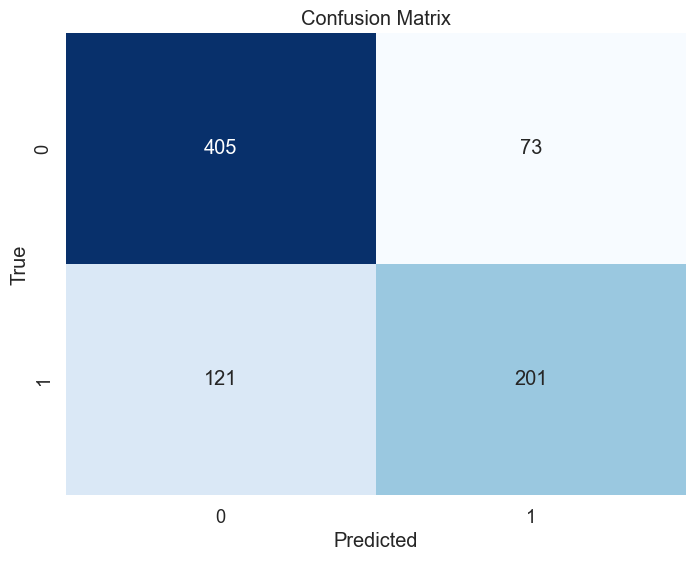

In [123]:
evaluate_model_with_graph(clf, X_test, y_test, classes=['0', '1'])